In [1]:
import json
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

from dart import dataset, DART

In [3]:
with open("results/sim64.json") as f:
    cfg = json.load(f)

dart = DART.from_config(**cfg)
state = dart.load("results/sim64.chkpt")

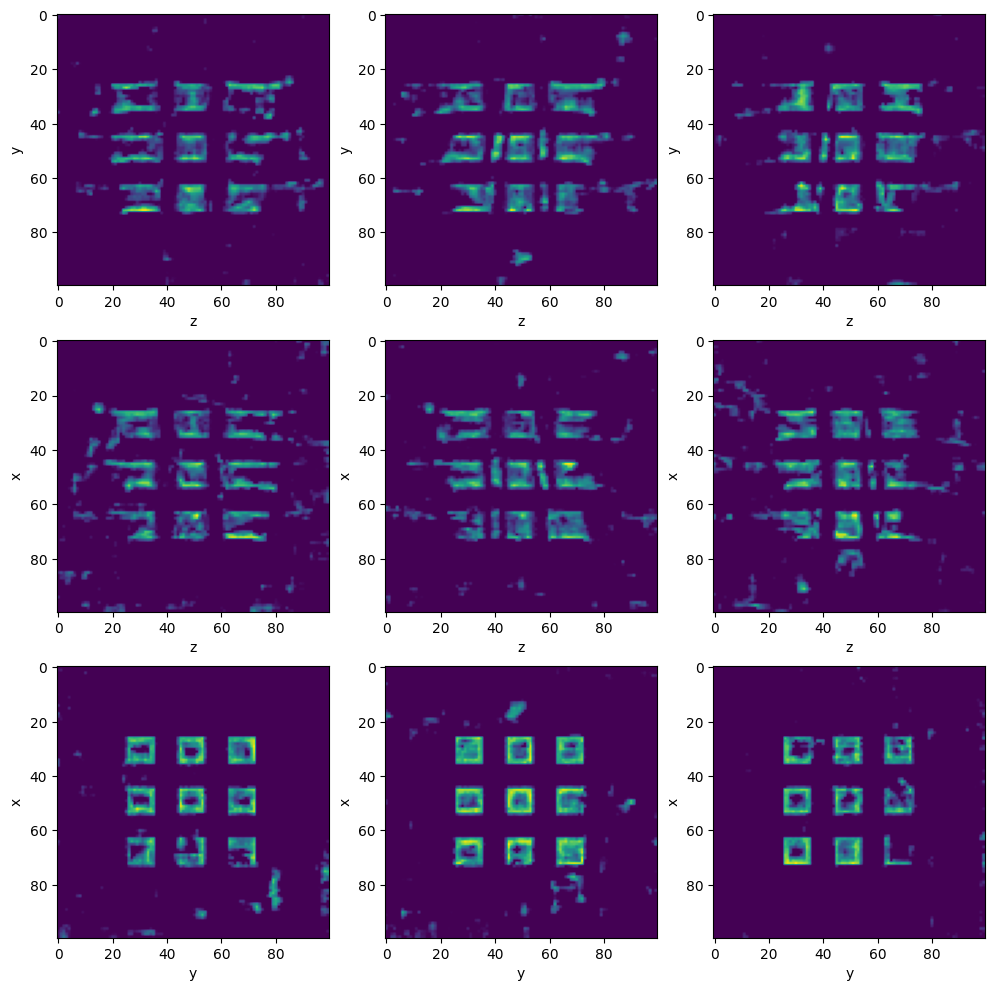

In [7]:
x = jnp.linspace(-5, 5, 100)
grid = dart.grid(state.params, x, x, x)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for layer, ax in zip([30, 50, 70], axs[0]):
    ax.imshow(grid[layer, :, :, 0])
    ax.set_ylabel("y")
    ax.set_xlabel("z")
for layer, ax in zip([30, 50, 70], axs[1]):
    ax.imshow(grid[:, layer, :, 0])
    ax.set_ylabel("x")
    ax.set_xlabel("z")
for layer, ax in zip([30, 50, 70], axs[2]):
    ax.imshow(grid[:, :, layer, 0])
    ax.set_ylabel("x")
    ax.set_xlabel("y")

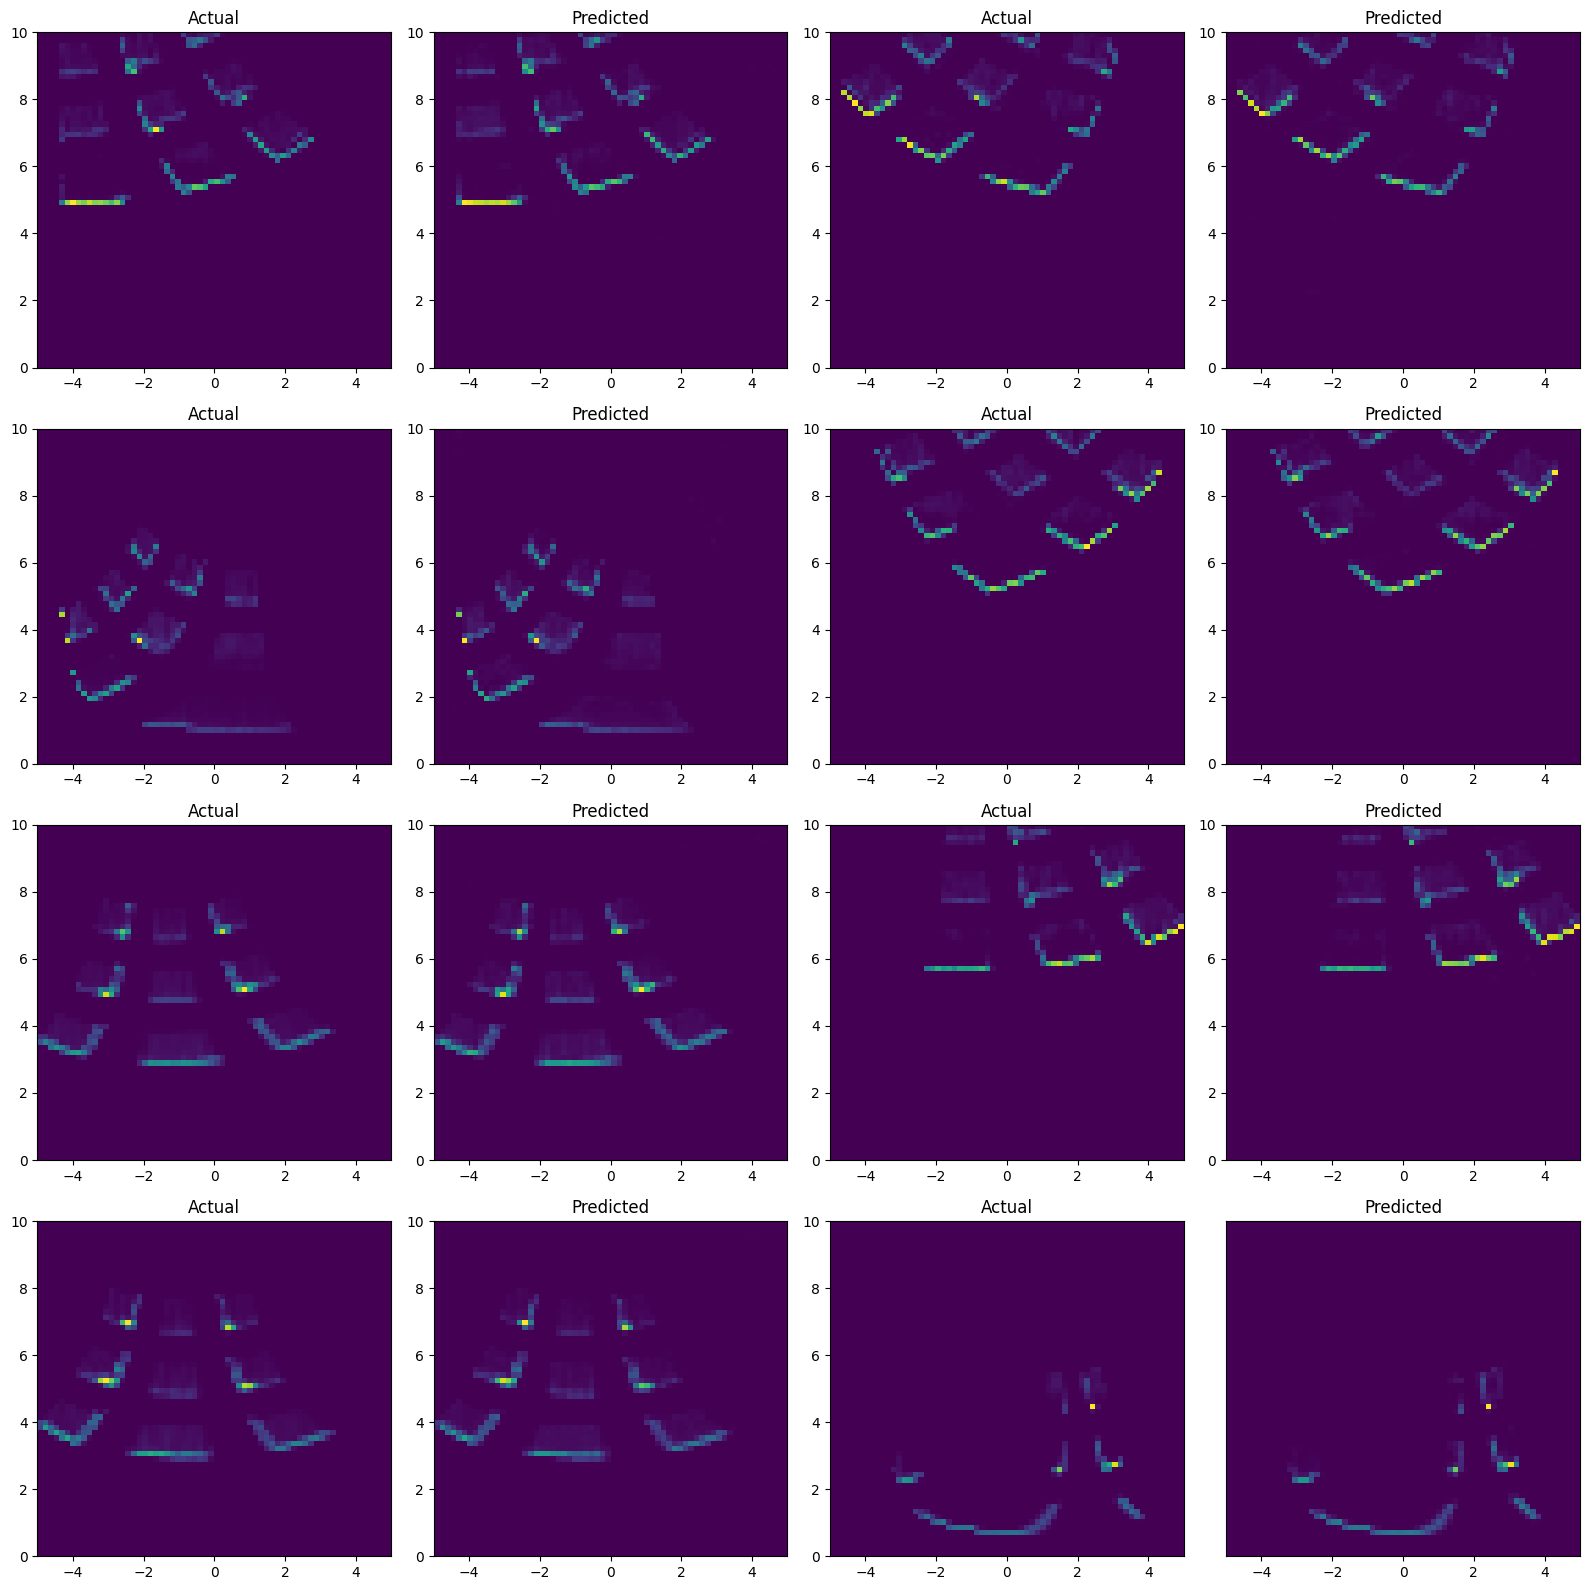

In [6]:
traj = dataset.image_traj("data/cubes64.mat")
poses, images = list(traj.shuffle(10000).batch(8).take(1))[0]
poses_jnp = jax.tree_util.tree_map(jnp.array, poses)
predicted = dart.render(state, poses_jnp, key=42)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
dart.sensor.plot_images(axs, images, predicted)
fig.tight_layout()